<a href="https://colab.research.google.com/github/ngoan22mse23088/GraduationThesis/blob/master/Face_0.1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
# Load the dataset
drive.mount('/content/drive')

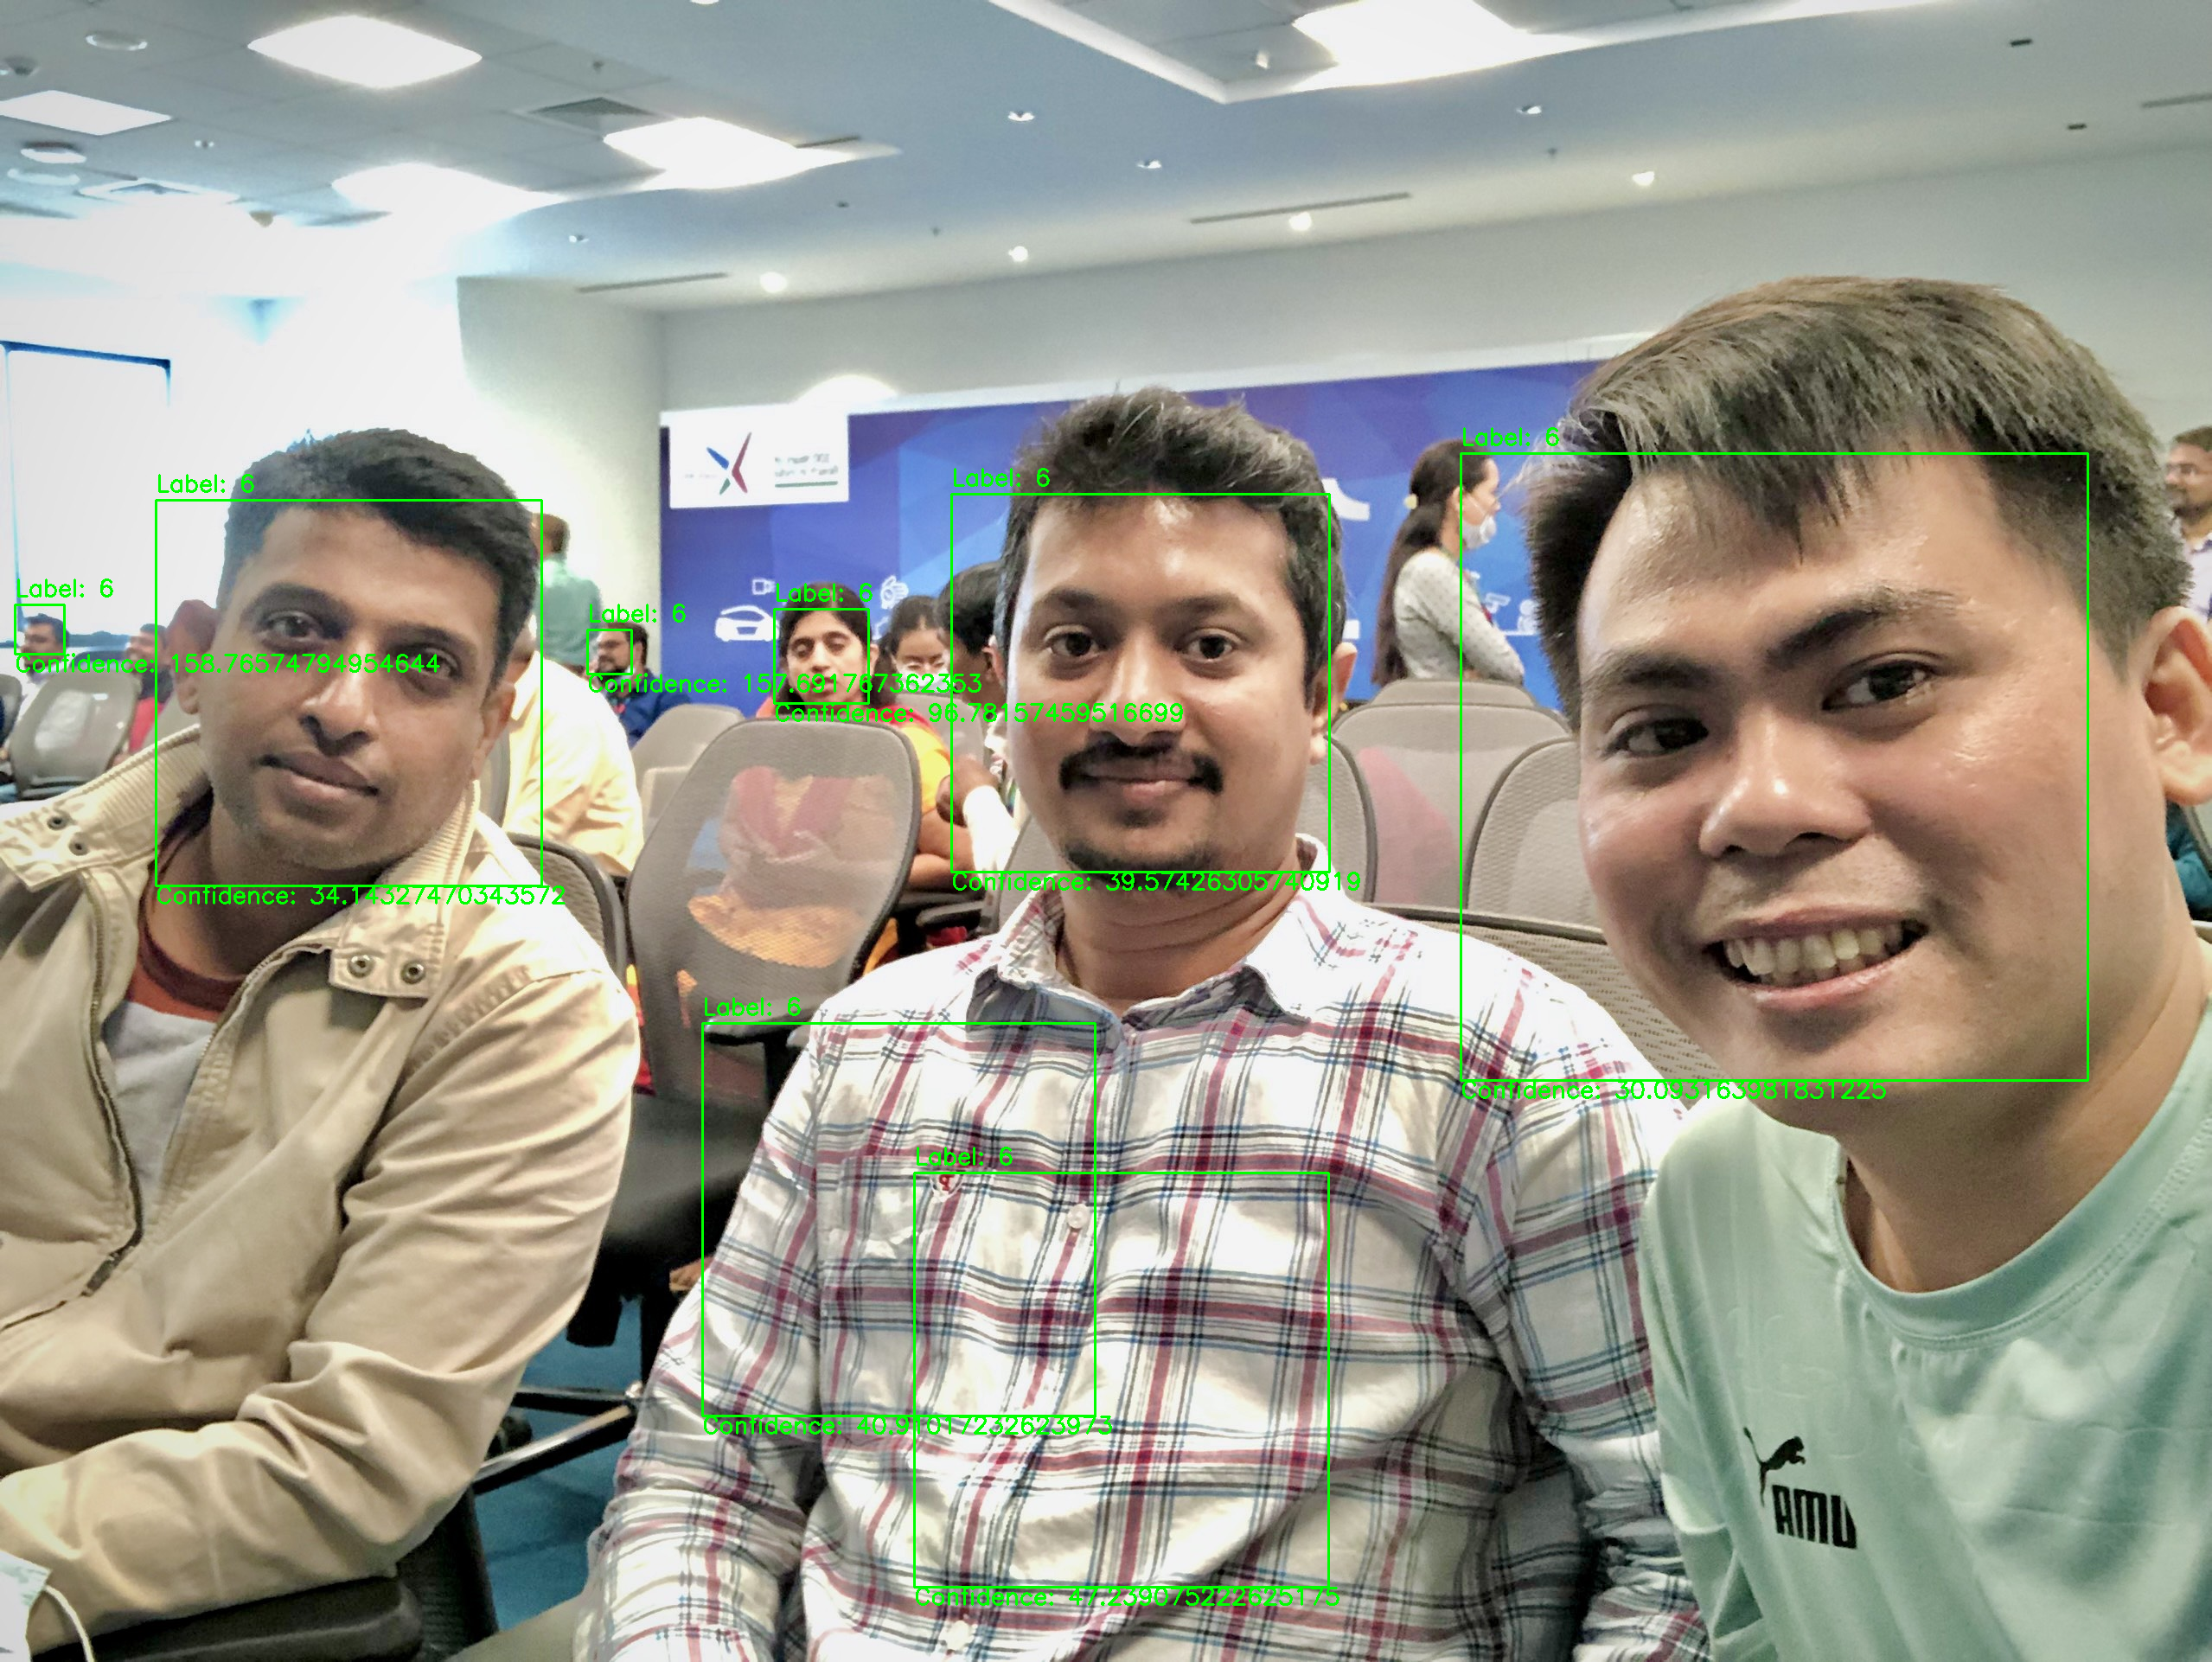

In [23]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Function to train the face recognition model
def train_face_recognizer(images_folder):
    # Create LBPH face recognizer
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()

    # List to store face samples
    faces = []
    # List to store corresponding labels
    labels = []

    # Get the paths of all images in the images folder
    image_paths = [os.path.join(images_folder, f) for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

    # Loop through all images
    for image_path in image_paths:
        # Load the image
        image = cv2.imread(image_path)
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Get the label from the image file name
        label = int(os.path.splitext(os.path.basename(image_path))[0])

        # Add the face sample and label to the lists
        faces.append(gray)
        labels.append(label)

    # Train the face recognizer with the face samples and labels
    face_recognizer.train(faces, np.array(labels))

    return face_recognizer

# Path to the folder containing images for training
images_folder = '/content/drive/MyDrive/Training_Set'

# Train the face recognizer
face_recognizer = train_face_recognizer(images_folder)

# Load the test image
test_image = cv2.imread('/content/drive/MyDrive/Training_Set/6.jpg')

# Recognize faces in the test image
output_image = recognize_faces(test_image, face_recognizer)

# Display the output image
cv2_imshow(output_image)


In [ ]:
# Import libraries
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize face detection model
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

# Initialize drawing utilities
mp_drawing = mp.solutions.drawing_utils

# Create a list of image paths
image_paths = ["/content/drive/MyDrive/Training_Set/5.jpg",
               "/content/drive/MyDrive/Training_Set/6.jpg",
               "/content/drive/MyDrive/Training_Set/7.jpg",
               "/content/drive/MyDrive/Training_Set/8.jpg"]

# Create a figure
fig = plt.figure(figsize = [12, 12])

# Loop through the image paths
for i, image_path in enumerate(image_paths):
  # Read the image
  image = cv2.imread(image_path)

  # Convert the image to RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Perform face detection
  results = face_detection.process(image)

  # Draw bounding boxes on output image
  output_image = image.copy()
  if results.detections:
    for detection in results.detections:
      mp_drawing.draw_detection(output_image, detection,
                               bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))

  # Add a subplot for the image
  # Change the arguments to create a 2x2 grid
  fig.add_subplot(2, 2, i + 1)

  # Show the image
  plt.imshow(output_image)
  plt.axis('off')
  plt.title(f"Image {i + 1}")

# Display the figure
plt.show()

In [ ]:
# prompt: sample for Image Super-Resolution on Set14 - 3x upscaling
from google.colab import drive
import os
import cv2
from google.colab.patches import cv2_imshow

# Load the dataset
drive.mount('/content/drive')
root_dir = '/content/drive/MyDrive/Training_Set'

# Load the images
images = []
# Iterate through all subdirectories in the root directory
for subdir in os.listdir(root_dir):
  # Get the path to the current subdirectory
  dataset_path = os.path.join(root_dir, subdir)
  for file_name in os.listdir(dataset_path):
      # Create the full path to the image
      img_path = os.path.join(dataset_path, file_name)
      image = cv2.imread(img_path)
      images.append(image)
      # Show the new image
      # cv2_imshow(image)

# Upscale the images using the model
upscaled_images = []
for image in images:
  upscaled_image = cv2.resize(image, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
  upscaled_images.append(upscaled_image)
  cv2_imshow(upscaled_image)

# Save the upscaled images
for i, upscaled_image in enumerate(upscaled_images):
  cv2_imshow(image)
  output_path = os.path.join(dataset_path, f'upscaled_image_{i+1}.png')
  cv2.imwrite(output_path, upscaled_image)